<a href="https://colab.research.google.com/github/sardarmonsoorsait/housepriceprediction/blob/main/housepriceprediction_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
path_train ="/content/drive/My Drive/house_price_data/train.csv" 
path_test = "/content/drive/My Drive/house_price_data/test.csv"
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

df_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [10]:
num_clm = df_train.select_dtypes(exclude=['object']).keys()
num_clm

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

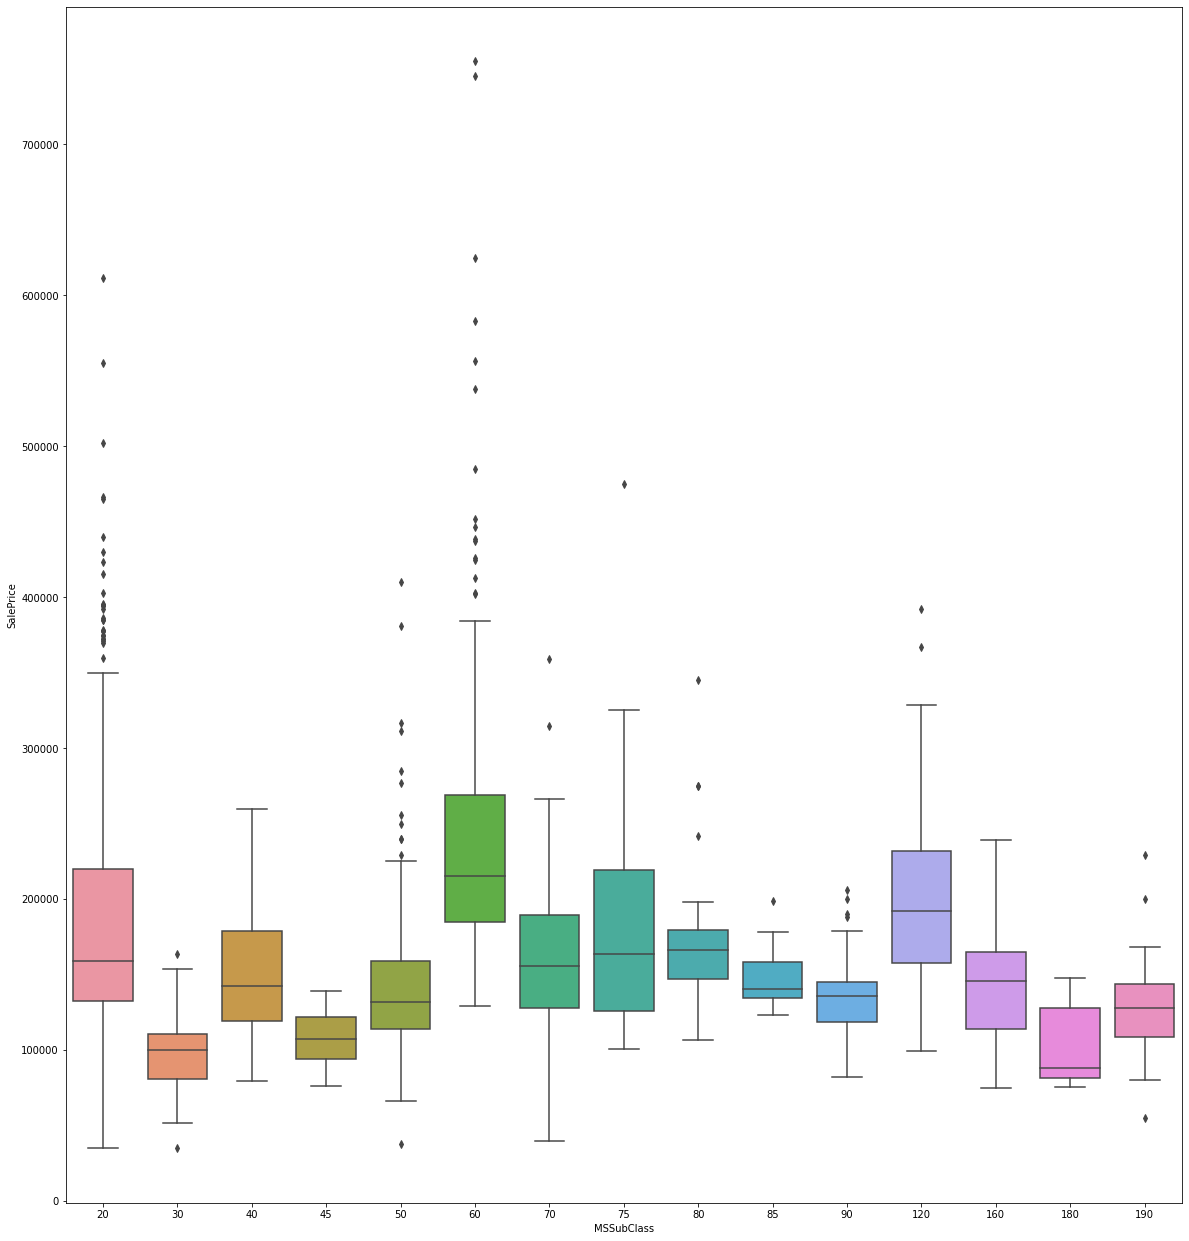

In [14]:

plt.figure(figsize=(20,22))
sns.boxplot(x='MSSubClass',y='SalePrice',data=df_train)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


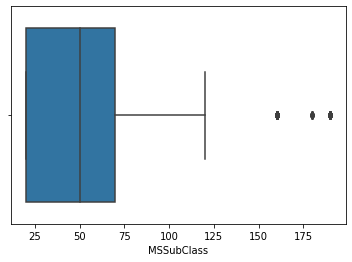

In [21]:
sns.boxplot(df_train['MSSubClass'])

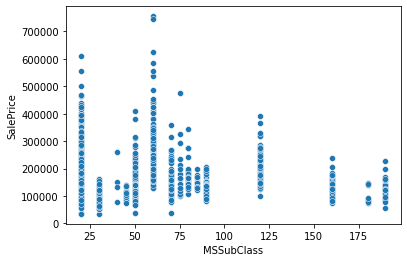

In [22]:
sns.scatterplot(x='MSSubClass',y='SalePrice',data=df_train)

In [16]:
df_train['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


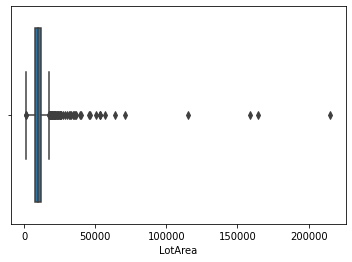

In [18]:
sns.boxplot(df_train['LotArea'])

In [24]:
from scipy import stats

z = np.abs(stats.zscore(df_train[num_clm]))
print(z)

[[1.73086488 0.07337496        nan ... 1.5991111  0.13877749 0.34727322]
 [1.7284922  0.87256276        nan ... 0.48911005 0.61443862 0.00728832]
 [1.72611953 0.07337496        nan ... 0.99089135 0.13877749 0.53615372]
 ...
 [1.72611953 0.30985939        nan ... 0.48911005 1.64520971 1.07761115]
 [1.7284922  0.87256276        nan ... 0.8591104  1.64520971 0.48852299]
 [1.73086488 0.87256276        nan ... 0.1191097  0.13877749 0.42084081]]


In [25]:
print(np.where(z>3))

(array([   1,    3,    5,    7,    8,    9,    9,   17,   24,   26,   28,
         33,   37,   39,   41,   46,   48,   48,   50,   51,   52,   53,
         53,   53,   53,   55,   58,   64,   70,   72,   74,   78,   80,
         88,   88,   93,   93,   93,  102,  104,  113,  116,  116,  118,
        120,  125,  125,  129,  129,  137,  137,  144,  144,  153,  154,
        159,  165,  165,  166,  166,  166,  169,  170,  176,  176,  178,
        178,  178,  182,  185,  185,  185,  185,  185,  185,  185,  187,
        188,  188,  188,  189,  189,  191,  196,  197,  197,  197,  197,
        197,  198,  201,  205,  213,  215,  218,  218,  224,  224,  224,
        233,  237,  241,  245,  246,  246,  249,  249,  250,  251,  253,
        253,  258,  260,  260,  263,  263,  267,  271,  273,  278,  280,
        289,  291,  291,  293,  297,  298,  298,  299,  300,  304,  304,
        304,  304,  306,  309,  312,  312,  313,  313,  313,  314,  314,
        322,  325,  326,  328,  330,  330,  330,  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [26]:
z[1][18]

3.948809348331338

In [28]:
q1 = df_train[num_clm].quantile(0.75)
q3 = df_train[num_clm].quantile(0.25)
iqr = q1-q3
print(iqr)



Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

In [31]:
print( (df_train[num_clm]<(q1-1.5*iqr)) | (df_train[num_clm]>(q3+1.5*iqr)))

         Id  MSSubClass  LotFrontage  ...  MoSold  YrSold  SalePrice
0     False       False        False  ...    True   False      False
1     False       False        False  ...   False   False      False
2     False       False        False  ...   False   False      False
3     False       False        False  ...    True   False      False
4     False       False        False  ...    True   False      False
...     ...         ...          ...  ...     ...     ...        ...
1455  False       False        False  ...   False   False      False
1456  False       False        False  ...    True   False      False
1457  False       False        False  ...   False   False       True
1458  False       False        False  ...   False   False      False
1459  False       False        False  ...   False   False      False

[1460 rows x 38 columns]


In [39]:
df_train_outlier = df_train[~((df_train[num_clm]<(q1-1.5*iqr)) | (df_train[num_clm]>(q3+1.5*iqr))).any(axis=1)]

In [41]:
df_train_outlier[num_clm]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
19,20,20,70.0,7560,5,6,1958,1965,0.0,504,0,525,1029,1339,0,0,1339,0,0,1,0,3,1,6,0,1958.0,1,294,0,0,0,0,0,0,0,5,2009,139000
57,58,60,89.0,11645,7,5,2004,2004,0.0,0,0,860,860,860,860,0,1720,0,0,2,1,3,1,7,0,2004.0,2,565,0,70,0,0,0,0,0,8,2006,196500
60,61,20,63.0,13072,6,5,2004,2004,0.0,941,0,217,1158,1158,0,0,1158,1,0,1,1,3,1,5,0,2006.0,2,576,0,50,0,0,0,0,0,5,2006,158000
67,68,20,72.0,10665,7,5,2003,2003,167.0,1013,0,440,1453,1479,0,0,1479,1,0,2,0,3,1,7,0,2003.0,2,558,144,29,0,0,0,0,0,6,2007,226000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,1402,60,62.0,7415,6,5,2004,2004,0.0,759,0,80,839,864,729,0,1593,1,0,2,1,3,1,8,1,2004.0,2,398,100,75,0,0,0,0,0,4,2008,193000
1410,1411,60,79.0,12420,7,5,2001,2001,0.0,666,0,278,944,944,896,0,1840,1,0,2,1,3,1,6,0,2001.0,2,622,0,45,0,0,0,0,0,6,2009,230000
1427,1428,50,60.0,10930,5,6,1945,1950,0.0,580,0,333,913,1048,510,0,1558,1,0,1,1,3,1,6,1,1962.0,1,288,0,0,0,0,0,0,0,4,2008,140000
1436,1437,20,60.0,9000,4,6,1971,1971,0.0,616,0,248,864,864,0,0,864,0,0,1,0,3,1,5,0,1974.0,2,528,0,0,0,0,0,0,0,5,2007,120500


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


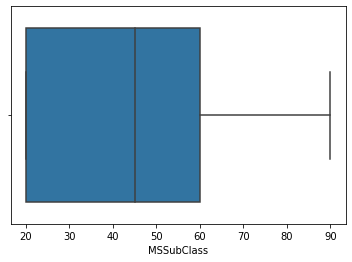

In [42]:
sns.boxplot(df_train_outlier['MSSubClass'])

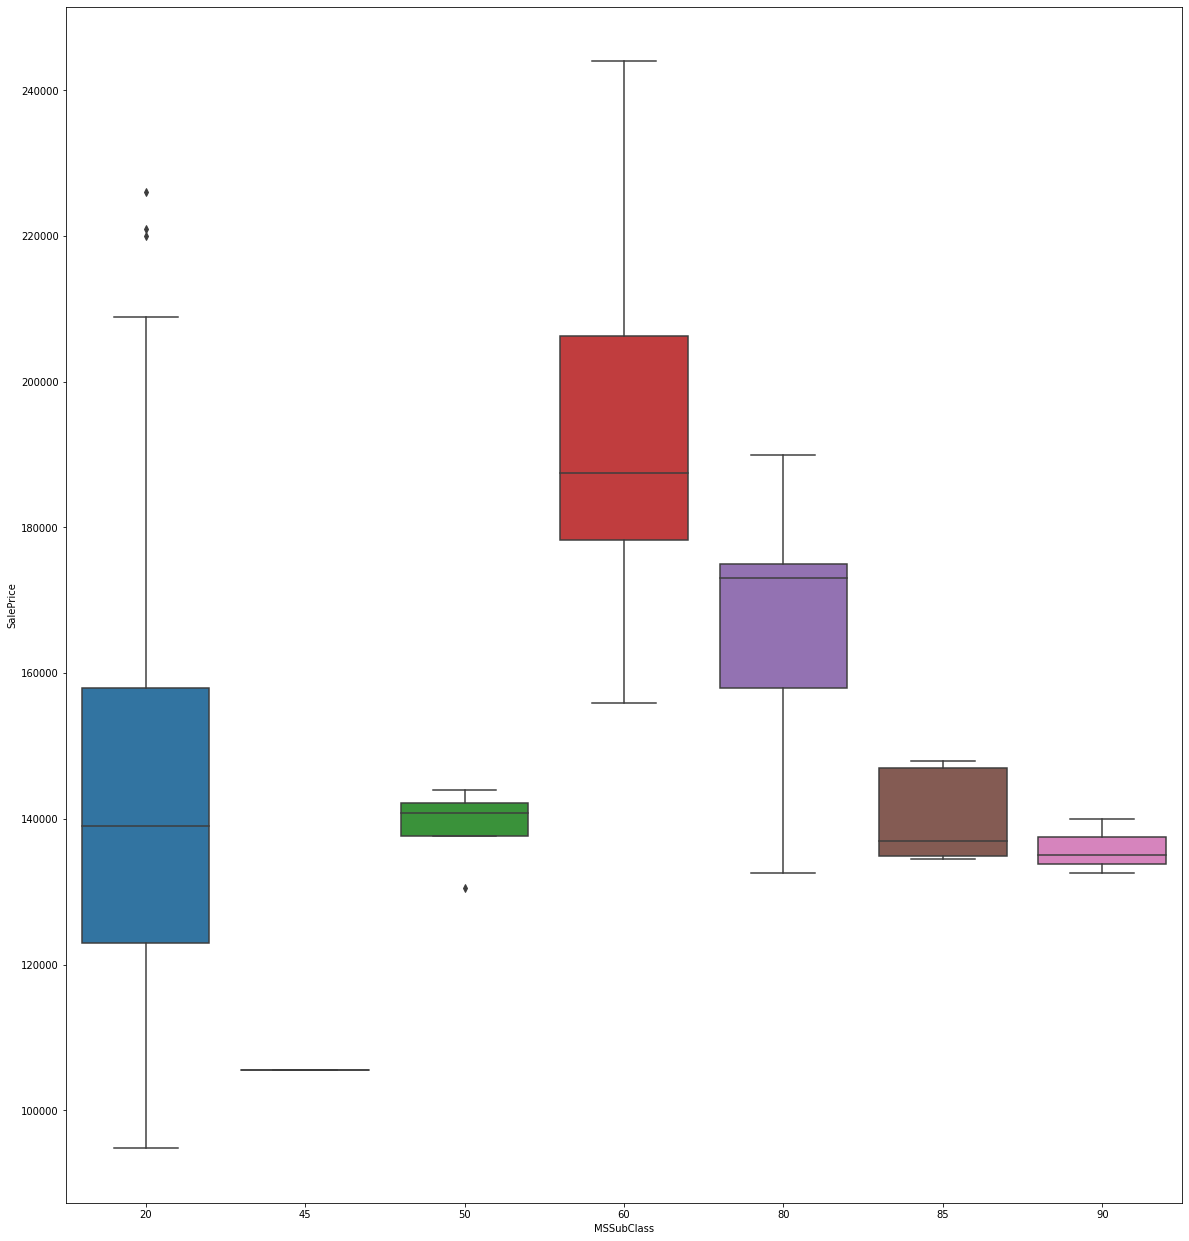

In [44]:
plt.figure(figsize=(20,22))
sns.boxplot(x='MSSubClass',y='SalePrice',data=df_train_outlier)

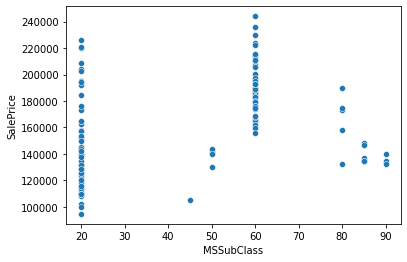

In [46]:
sns.scatterplot(x='MSSubClass',y='SalePrice',data=df_train_outlier)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


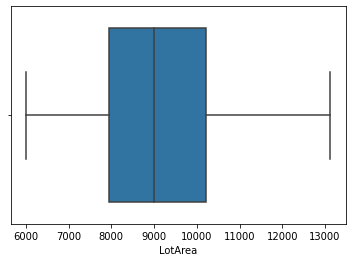

In [47]:
sns.boxplot(df_train_outlier['LotArea'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


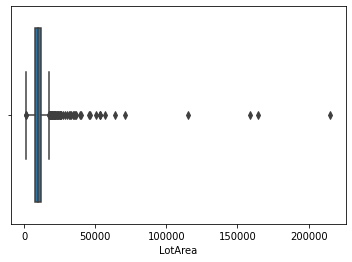

In [48]:
sns.boxplot(df_train['LotArea'])